# Microsoft Film Production Analysis

### By Mohamed Hassan

# Overview:

This project is focused on forming a plan for Microsoft to create films for a new movie studio. I will use dataframes that illustrate how much should be spent in producing films, the type of films that are worth being invested in, and when these films should be released in theaters.  

## Business Problem:

Creating video content has become popular among big companies. As part of their success, companies have produced films that have generated a substantial amount of revenue, both domestic and international. As a new startup movie studio, it is important to identify the type of films that translate to success at the box office. Factors that I will discuss are the genre of films that generate the most revenue, the amount of financing in production budgets that produce these high-grossing films, and if there is a connection between high-grossing films and the month they are released.

# Data Preparation:

   During this process of preparing the data, I looked at 11 dataframes and decided that three of the dataframes provided the most pertinent information to determine what factors must be considered when starting a production company. I will explain my methodology and reasoning in exploring each dataset.

# Data Understanding:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In this dataframe(df1) shows the domestic gross and foreign gross for each film. I focused specifically on the top ten studios that produced the most movies and had the highest domestic gross and foreign gross. The years measured in the dataset are from 2010 to 2018. There were a few NaN values in the studio and domestic gross columns, but 1350 NaN values in the foreign gross column. I decided to drop all the NaN values in each column, while also changing the datatype of the foreign gross column to int. As a result, I was able to aggregate the data of each column and conduct a comparative analysis.

In [2]:
df1 = pd.read_csv('bom.movie_gross.csv.gz')
df1

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:
df1.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [5]:
df1.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [6]:
df1.reset_index()

,index,title,studio,domestic_gross,foreign_gross,year
0,0,Toy Story 3,BV,415000000.0,652000000,2010
1,1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,3,Inception,WB,292600000.0,535700000,2010
4,4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...,...
3382,3382,The Quake,Magn.,6200.0,NaN,2018
3383,3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,3384,El Pacto,Sony,2500.0,NaN,2018
3385,3385,The Swan,Synergetic,2400.0,NaN,2018


In [7]:
df1.sort_values('domestic_gross', ascending=False)
df1.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [8]:
df1['domestic_gross'].median()

1400000.0

In [9]:
df1['year'].min()

2010

In [10]:
df1['year'].max()

2018

In [11]:
df1['studio'].value_counts()

IFC           166
Uni.          147
WB            140
Magn.         136
Fox           136
             ... 
IW              1
Dreamwest       1
Proud           1
CFI             1
Grindstone      1
Name: studio, Length: 257, dtype: int64

In [12]:
df1['studio'].isna().sum()

5

In [13]:
df1['domestic_gross'].isna().sum()

28

In [14]:
df1['foreign_gross'].isna().sum()

1350

In [15]:
df1['foreign_gross'] = df1['foreign_gross'].str.replace('.', '')

In [16]:
df1['foreign_gross'] = df1['foreign_gross'].str.replace(',', '')

In [17]:
df1 = df1.dropna(subset=['studio', 'domestic_gross', 'foreign_gross'])
df1

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


In [18]:
df1['foreign_gross'] = df1['foreign_gross'].astype(int)

<ipython-input-18-ebed7a60f181>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['foreign_gross'] = df1['foreign_gross'].astype(int)


In [19]:
df1['foreign_gross'].dtype

dtype('int64')

In [20]:
df1['studio'].isna().sum()

0

In [21]:
df1['domestic_gross'].isna().sum()

0

In [22]:
df1['foreign_gross'].isna().sum()

0

In [23]:
df1['studio'].value_counts().sort_values(ascending=False).head(10)

Uni.     144
Fox      134
WB       130
Sony     105
BV       104
Par.      94
LGF       87
Wein.     69
IFC       68
SPC       59
Name: studio, dtype: int64

In [24]:
df1.groupby('studio').mean().head(10)

,domestic_gross,foreign_gross,year
studio,,,
3D,6.100000e+06,9.900000e+06,2010.000000
A24,1.370825e+07,1.255064e+07,2015.473684
AF,5.775000e+05,1.750000e+06,2012.000000
AGF,1.580000e+04,1.610000e+05,2011.000000
AR,3.500000e+05,5.770000e+07,2016.000000
ATO,5.067500e+05,4.173500e+05,2011.500000
Abr.,1.573000e+06,5.150500e+06,2013.000000
Affirm,1.170000e+07,2.820000e+06,2017.500000
Amazon,3.400000e+06,6.960000e+06,2017.800000


In [25]:
df1_studio_gross= df1.groupby('studio').median()
df1_studio_gross

,domestic_gross,foreign_gross,year
studio,,,
3D,6100000.0,9900000.0,2010.0
A24,7600000.0,9700000.0,2016.0
AF,577500.0,1750000.0,2012.0
AGF,15800.0,161000.0,2011.0
AR,350000.0,57700000.0,2016.0
...,...,...,...
WOW,30800.0,18600.0,2010.0
Wein.,7800000.0,16300000.0,2013.0
Yash,3950000.0,52950000.0,2016.0


In [26]:
def studio_name(film_studios):
    if 'IFC' in film_studios:
        return 'IFC'
    elif 'Uni.' in film_studios:
        return 'Uni.'
    elif 'WB' in film_studios:
        return 'WB'
    elif 'Magn.' in film_studios:
        return 'Magn.'
    elif 'Fox' in film_studios:
        return 'Fox'
    elif 'SPC' in film_studios:
        return 'SPC'
    elif 'Sony' in film_studios:
        return 'Sony'
    elif 'BV' in film_studios:
        return 'BV'
    elif 'LGF' in film_studios:
        return 'LGF'
    elif 'Par.' in film_studios:
        return 'Par.'
    else:
        return 'Other'

In [27]:
df1['top_studios'] = df1['studio'].map(lambda n: studio_name(n))

<ipython-input-27-5fe6db63f2ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['top_studios'] = df1['studio'].map(lambda n: studio_name(n))


In [28]:
df1['top_studios'].value_counts()

Other    933
Fox      184
WB       174
Uni.     144
Sony     105
BV       104
Par.      94
LGF       87
IFC       68
SPC       59
Magn.     55
Name: top_studios, dtype: int64

In [29]:
df1

,title,studio,domestic_gross,foreign_gross,year,top_studios
0,Toy Story 3,BV,415000000.0,652000000,2010,BV
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,BV
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,WB
3,Inception,WB,292600000.0,535700000,2010,WB
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,Other
...,...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018,LGF
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018,IFC
3309,Time Freak,Grindstone,10000.0,256000,2018,Other
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018,Other


In [30]:
df_studio_revenue = df1.groupby('top_studios').median()
df_studio_revenue

,domestic_gross,foreign_gross,year
top_studios,,,
BV,93800000.0,127150000.0,2014.0
Fox,47150000.0,53800000.0,2014.0
IFC,196000.0,3050000.0,2011.0
LGF,28100000.0,22200000.0,2014.0
Magn.,124000.0,3500000.0,2012.0
Other,1700000.0,8700000.0,2013.0
Par.,58400000.0,67850000.0,2014.0
SPC,3100000.0,10400000.0,2011.0
Sony,67600000.0,80800000.0,2014.0


In this DataFrame(df2), I focused on the possible connections between production budgets and domestic gross, and production budgets and worldwide gross. In addition, I looked at the gross of each month domestically and internationally. The purpose was to see how much should be allocated in production budgets to achieve the highest grossing films, and what month films should be released. This DataFrame did not have any NaN or missing values in the columns I focused on: release dates, production budgets, domestic gross and worldwide gross. However, there were missing data in each domestic and worldwide gross columns, with a lot of zero values, which could change the findings of my analysis if those values were retrieved. Nevertheless, those values did not affect my ability to perform a comparative analysis. I aggregated data columns of release dates and domestic and worldwide gross, focusing specifically on the revenue gross of each month.

In [31]:
df2 = pd.read_csv('tn.movie_budgets.csv.gz')
df2

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [33]:
df2.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [34]:
df2['production_budget'] = df2['production_budget'].map(lambda x: x.lstrip('$,').replace(',', ''))

In [35]:
df2['production_budget']

0       425000000
1       410600000
2       350000000
3       330600000
4       317000000
          ...    
5777         7000
5778         6000
5779         5000
5780         1400
5781         1100
Name: production_budget, Length: 5782, dtype: object

In [36]:
df2['production_budget'].median()

17000000.0

In [37]:
df2['production_budget'].describe()

count         5782
unique         509
top       20000000
freq           231
Name: production_budget, dtype: object

In [38]:
df2['production_budget'] = df2['production_budget'].astype(int)

In [39]:
df2['production_budget'].dtype

dtype('int64')

In [40]:
df2['domestic_gross'] = df2['domestic_gross'].map(lambda x: x.lstrip('$,').replace(',', ''))

In [41]:
df2['domestic_gross']

0       760507625
1       241063875
2        42762350
3       459005868
4       620181382
          ...    
5777            0
5778        48482
5779         1338
5780            0
5781       181041
Name: domestic_gross, Length: 5782, dtype: object

In [42]:
df2['domestic_gross'] = df2['domestic_gross'].astype(int)

In [43]:
df2['domestic_gross'].median()

17225945.0

In [44]:
df2['worldwide_gross'] = df2['worldwide_gross'].map(lambda x: x.lstrip('$,').replace(',', ''))

In [45]:
df2['worldwide_gross']

0       2776345279
1       1045663875
2        149762350
3       1403013963
4       1316721747
           ...    
5777             0
5778        240495
5779          1338
5780             0
5781        181041
Name: worldwide_gross, Length: 5782, dtype: object

In [46]:
df2['worldwide_gross'].median()

27984448.5

In [47]:
df2['worldwide_gross'] = df2['worldwide_gross'].astype(int)

* While analyzing release dates, I looked at the number of films that were released on specific dates. When I looked at the date that had the highest number of films, I discovered that there were several zero values in the domestic and foreign gross columns:

In [48]:
df2['release_date'] = df2['release_date'].str.replace(',', '')

In [49]:
df2['release_date'].isna().sum()

0

In [50]:
df2['release_date'].iloc[0]

'Dec 18 2009'

In [51]:
df2['release_date'].describe()

count            5782
unique           2418
top       Dec 31 2014
freq               24
Name: release_date, dtype: object

In [52]:
df2['release_date'].value_counts().head(10)

Dec 31 2014    24
Dec 31 2015    23
Dec 31 2010    15
Dec 31 2008    14
Dec 31 2012    13
Dec 31 2009    13
Dec 31 2013    13
Dec 31 2011    11
Apr 28 2006     9
Oct 10 2014     9
Name: release_date, dtype: int64

In [53]:
df2.loc[df2['release_date'] == 'Dec 31 2014']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
1540,41,Dec 31 2014,Dragon Nest Warriors' Dawn,40000000,0,734423
2667,68,Dec 31 2014,A Most Violent Year,20000000,5749134,8846875
4850,51,Dec 31 2014,Not Safe For Work,2500000,0,0
4991,92,Dec 31 2014,Lucky Dog,2000000,0,0
5126,27,Dec 31 2014,Kurmanjan datka,1400000,0,0
5127,28,Dec 31 2014,House at the End of the Drive,1400000,0,0
5316,17,Dec 31 2014,Doc Holliday's Revenge,1000000,0,0
5320,21,Dec 31 2014,Bang Bang Baby,1000000,0,0
5344,45,Dec 31 2014,40 Weeks,900000,0,0
5383,84,Dec 31 2014,Destiny,750000,0,450


* As a result, I began to focus just on the months of the release dates of films:

In [54]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
months

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

In [55]:
df2['month'] = pd.DatetimeIndex(df2['release_date']).month
df2

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,month
0,1,Dec 18 2009,Avatar,425000000,760507625,2776345279,12
1,2,May 20 2011,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,5
2,3,Jun 7 2019,Dark Phoenix,350000000,42762350,149762350,6
3,4,May 1 2015,Avengers: Age of Ultron,330600000,459005868,1403013963,5
4,5,Dec 15 2017,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,12
...,...,...,...,...,...,...,...
5777,78,Dec 31 2018,Red 11,7000,0,0,12
5778,79,Apr 2 1999,Following,6000,48482,240495,4
5779,80,Jul 13 2005,Return to the Land of Wonders,5000,1338,1338,7
5780,81,Sep 29 2015,A Plague So Pleasant,1400,0,0,9


In [56]:
df_monthly = df2.groupby('month').mean().reset_index()
df_monthly

,month,id,production_budget,domestic_gross,worldwide_gross
0,1,50.060519,2.084349e+07,2.394962e+07,4.656382e+07
1,2,50.650510,2.804642e+07,3.541465e+07,7.154453e+07
2,3,49.917021,3.078208e+07,3.857299e+07,8.063337e+07
3,4,51.121145,2.380283e+07,2.732840e+07,5.992026e+07
4,5,50.555283,4.713520e+07,6.669795e+07,1.622680e+08
5,6,50.102296,4.309912e+07,6.582791e+07,1.425230e+08
6,7,50.104545,4.254616e+07,6.072804e+07,1.409636e+08
7,8,52.475806,2.555609e+07,3.216821e+07,6.097841e+07
8,9,48.488844,2.181290e+07,2.314989e+07,4.669369e+07
9,10,49.991274,2.039266e+07,2.442350e+07,4.946456e+07


In the third dataframe(df3), I analyzed the connection between the genre of films and box office revenue, focusing on the most produced fil genres and their revenue intake. While there were few NaN values in the genre column, there were many NaN values in the box office column. As in the previous dataframes, these missing values could change my findings if these values were retrieved. Also, there was no specification as to what type of revenue was included in the box office column. Nevertheless, I dropped the NaN values in each column, and reassigned variables in genres based on the most number of films in a genre. As a result, this allowed me to analyze what genres generated the most revenue. 

In [57]:
df3 = pd.read_csv('rt.movie_info.tsv.gz',sep='\t')
df3

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [58]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [59]:
df3.describe()

,id
count,1560.000000
mean,1007.303846
std,579.164527
min,1.000000
25%,504.750000
50%,1007.500000
75%,1503.250000
max,2000.000000


In [60]:
df3.dtypes

id               int64
synopsis        object
rating          object
genre           object
director        object
writer          object
theater_date    object
dvd_date        object
currency        object
box_office      object
runtime         object
studio          object
dtype: object

In [61]:
df3['genre'].isna().sum()

8

In [62]:
df3['box_office'].isna().sum()

1220

In [63]:
df3 = df3.dropna(subset=['genre', 'box_office'])
df3

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117 minutes,NaN
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures
...,...,...,...,...,...,...,...,...,...,...,...,...
1541,1980,A band of renegades on the run in outer space ...,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,Joss Whedon,"Sep 30, 2005","Dec 20, 2005",$,"25,335,935",119 minutes,Universal Pictures
1542,1981,"Money, Fame and the Knowledge of English. In I...",NR,Comedy|Drama,Gauri Shinde,Gauri Shinde,"Oct 5, 2012","Nov 20, 2012",$,"1,416,189",129 minutes,Eros Entertainment
1545,1985,A woman who joins the undead against her will ...,R,Horror|Mystery and Suspense,Sebastian Gutierrez,Sebastian Gutierrez,"Jun 1, 2007","Oct 9, 2007",$,"59,371",98 minutes,IDP Distribution
1546,1986,Aki Kaurismaki's The Man Without a Past opens ...,PG,Art House and International|Comedy|Drama,NaN,NaN,"Aug 30, 2002","Oct 7, 2003",$,"794,306",97 minutes,NaN


In [64]:
df3['genre'].isna().sum()

0

In [65]:
df3['box_office'].isna().sum()

0

In [66]:
df3['box_office'] = df3['box_office'].str.replace(',', '').astype(int)

<ipython-input-66-a0db59d6dfe6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['box_office'] = df3['box_office'].str.replace(',', '').astype(int)


In [67]:
df3['genre'].value_counts().sort_values(ascending=False).head(10)

Drama                                              48
Comedy                                             40
Comedy|Drama                                       26
Drama|Mystery and Suspense                         13
Comedy|Drama|Romance                               11
Comedy|Romance                                     10
Action and Adventure|Drama                          9
Action and Adventure|Drama|Mystery and Suspense     9
Action and Adventure|Mystery and Suspense           8
Art House and International|Drama                   7
Name: genre, dtype: int64

In [68]:
df3.groupby('genre').mean().head(10)

,id,box_office
genre,,
Action and Adventure,1657.0,1526248.0
Action and Adventure|Animation|Comedy,564.0,114053579.0
Action and Adventure|Animation|Comedy|Drama|Kids and Family,1418.0,106604314.0
Action and Adventure|Animation|Comedy|Kids and Family,586.5,33636018.5
Action and Adventure|Animation|Comedy|Science Fiction and Fantasy,482.0,21379315.0
Action and Adventure|Animation|Kids and Family,1601.0,123188232.0
Action and Adventure|Animation|Kids and Family|Science Fiction and Fantasy,1582.5,28834309.0
Action and Adventure|Animation|Science Fiction and Fantasy,452.0,54132596.0
Action and Adventure|Art House and International,1233.0,1275777.5


In [69]:
def genre_name(film_genres):
    if 'Action and Adventure' in film_genres:
        return 'Action and Adventure'
    elif 'Drama' in film_genres:
        return 'Drama'
    elif 'Comedy' in film_genres:
        return 'Comedy'
    elif 'Animation' in film_genres:
        return 'Animation'
    else:
        return 'Other'

In [70]:
df3['single_genre'] = df3['genre'].map(lambda n: genre_name(n))

<ipython-input-70-4644ac63a4ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['single_genre'] = df3['genre'].map(lambda n: genre_name(n))


In [71]:
genre_counts = df3['single_genre'].value_counts()

In [72]:
genre_counts.index

Index(['Drama', 'Action and Adventure', 'Comedy', 'Other', 'Animation'], dtype='object')

In [73]:
df_genre_revenue = df3.groupby('single_genre').mean()['box_office']
df_genre_revenue

single_genre
Action and Adventure    6.232875e+07
Animation               3.010245e+07
Comedy                  5.244855e+07
Drama                   2.198766e+07
Other                   2.712480e+07
Name: box_office, dtype: float64

In [74]:
df3

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,single_genre
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000,108 minutes,Entertainment One,Drama
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,41032915,82 minutes,Paramount Pictures,Comedy
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,224114,123 minutes,Sony Pictures Classics,Drama
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,134904,117 minutes,NaN,Drama
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,1039869,108 minutes,ATO Pictures,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,1980,A band of renegades on the run in outer space ...,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,Joss Whedon,"Sep 30, 2005","Dec 20, 2005",$,25335935,119 minutes,Universal Pictures,Action and Adventure
1542,1981,"Money, Fame and the Knowledge of English. In I...",NR,Comedy|Drama,Gauri Shinde,Gauri Shinde,"Oct 5, 2012","Nov 20, 2012",$,1416189,129 minutes,Eros Entertainment,Drama
1545,1985,A woman who joins the undead against her will ...,R,Horror|Mystery and Suspense,Sebastian Gutierrez,Sebastian Gutierrez,"Jun 1, 2007","Oct 9, 2007",$,59371,98 minutes,IDP Distribution,Other
1546,1986,Aki Kaurismaki's The Man Without a Past opens ...,PG,Art House and International|Comedy|Drama,NaN,NaN,"Aug 30, 2002","Oct 7, 2003",$,794306,97 minutes,NaN,Drama


# Data Modeling:

For this project, I used matplotlib and seaborn to graph my findings. I used matplotlib to create bar plots for most of the data subsets I analyzed. In the subsets that had domestic and foreign gross numbers, I created a bar plots for each with the same x value. While I initially intended to just focus on domestic gross, I also included foreign revenue to see if there was any differences. Based on the data provided and the data analyzed, I believe the plots used were appropriate in addressing the problem of creating a film production studio. 

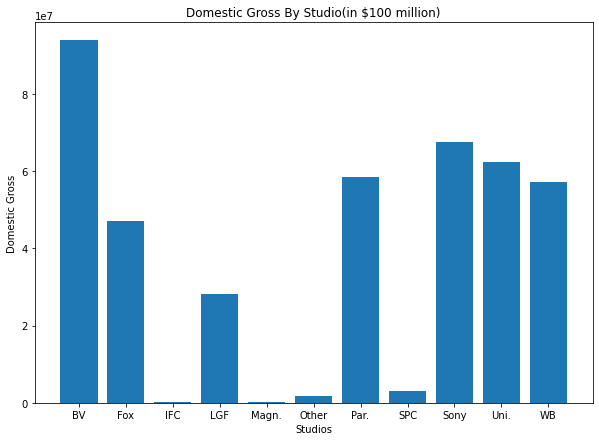

In [75]:
fig = plt.figure(figsize =(10, 7))

plt.bar(x=df_studio_revenue.index, height=df_studio_revenue['domestic_gross']);
plt.xlabel('Studios')
plt.ylabel('Domestic Gross')
plt.title('Domestic Gross By Studio(in $100 million)')
plt.show()

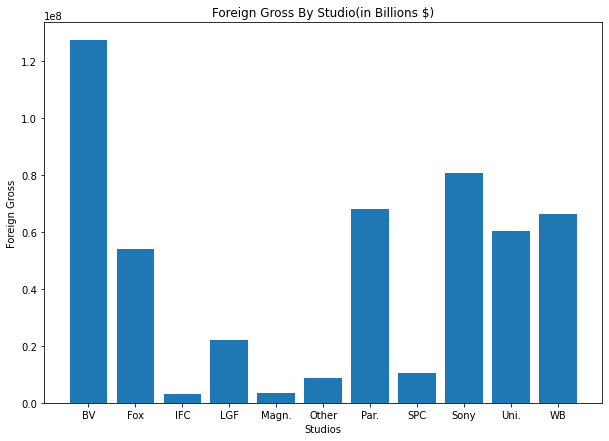

In [76]:
fig = plt.figure(figsize =(10, 7))

plt.bar(x=df_studio_revenue.index, height=df_studio_revenue['foreign_gross']);
plt.xlabel('Studios')
plt.ylabel('Foreign Gross')
plt.title('Foreign Gross By Studio(in Billions $)')
plt.show()

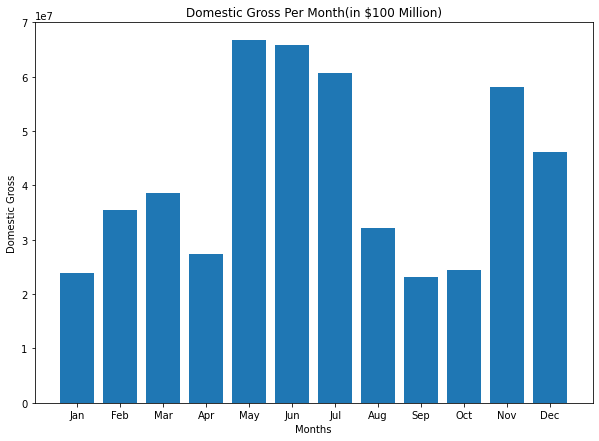

In [77]:
fig = plt.figure(figsize =(10, 7))

plt.bar(x=months, height=df_monthly['domestic_gross']);
plt.xlabel('Months')
plt.ylabel('Domestic Gross')
plt.title('Domestic Gross Per Month(in $100 Million)')
plt.show()

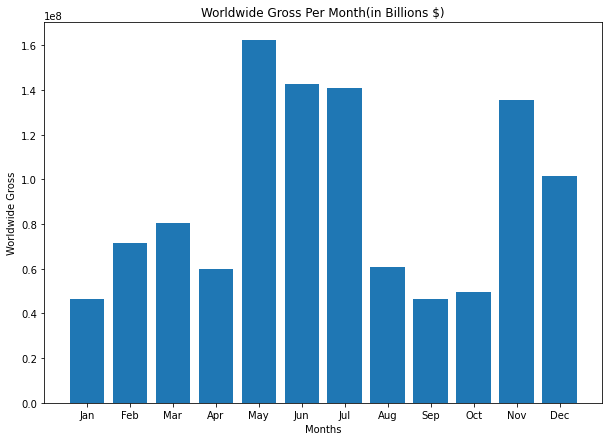

In [78]:
fig = plt.figure(figsize =(10, 7))

plt.bar(x=months, height=df_monthly['worldwide_gross']);
plt.xlabel('Months')
plt.ylabel('Worldwide Gross')
plt.title('Worldwide Gross Per Month(in Billions $)')
plt.show()

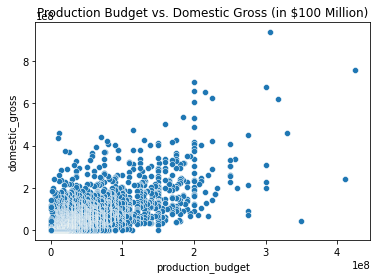

In [79]:
sns.scatterplot(x='production_budget', y='domestic_gross', data=df2).set_title('Production Budget vs. Domestic Gross (in $100 Million)');

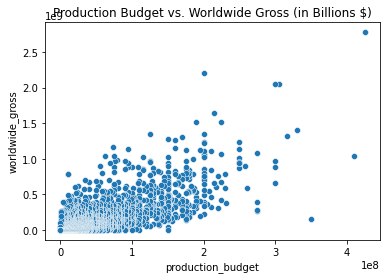

In [80]:
sns.scatterplot(x='production_budget', y='worldwide_gross', data=df2).set_title('Production Budget vs. Worldwide Gross (in Billions $)');

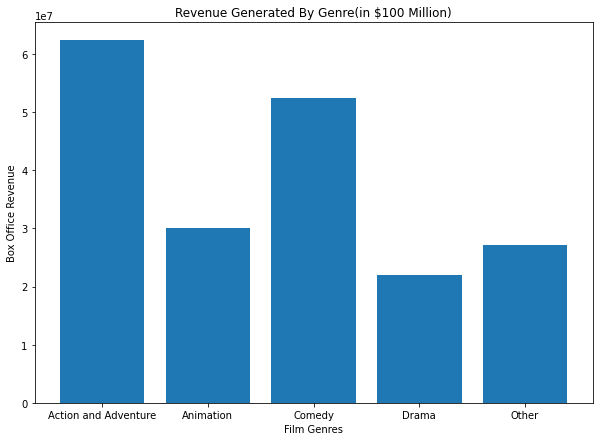

In [81]:
fig = plt.figure(figsize =(10, 7))


plt.bar(x=df_genre_revenue.index, height=df_genre_revenue)
plt.xlabel('Film Genres')
plt.ylabel('Box Office Revenue')
plt.title('Revenue Generated By Genre(in $100 Million)')
plt.show()

# Conclusion:

   The studio that generated the most revenue was BV, followed by Sony and Universal. The month that generated the most revenue was May, followed by June and July. In regards to production budgets, there was a strong correlation between the amount of money spent on production and the revenue generated. Lastly, the genre that had the most earnings were Action and Adventure movies. Based on the findings of this project, there are some recommendations to be made when considering what areas to focus on. There was little to no differences when comparing the domestic and foreign gross to each company, as well as comparing them to the production budgets of the highest grossing films and the months that generated the most revenue. I would recommend that when hiring people to begin the production company, an emphasis should be made on the employees from BV, Sony, and Universal, but primarily from BV. Based on the plot above, there was a strong correlation between production budgets and gross, so I suggest that production budgets should be allocated proper funding in order to generate substantial revenue. The type of films that should be created should be primarily Action and Adventure, although Comedy films can also achieve this goal. Finally, warmer weather brings in a lot of people to the movie theaters. Therefore, the month that films should be released is in May. However, June and July can also generate almost the same amount of revenue and should be considered alternative options to release films.

   While the data used in this analysis is helpful to solving the business problem, there are other steps that should be taken. The data columns in this project had a lot of missing data that may have changed the conclusions previously outlined. Further research should utilize other datasets from different outlets that does not have missing data and the most recent. This would ensure that the data compiled is complete and accurate, helping to find modern solutions. Secondly, more studies should be conducted when looking at the impact of streaming services on revenue growth from theaters. As streaming has become more popular, an analysis should be done to see if that has led to a decline in consumers going to movie theaters in the past ten years. Lastly, COVID-19 has dramatically affected movie theaters and changed the way consumers watch movies. Therefore, studies should be done to see if the pandemic has changed their behavior, such as the likelihood of going to movie theaters and whether they would prefer film genres that were more relevant to their way of life.